## 1. Data Preprocessing

### 1.1 Load the dataset using Pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head()   

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 1.2 Rename columns
- Transaction_ID
- Date
- Customer_ID
- Product_Category
- Amount_Spent
- Units_Purchased
- Payment_Type
- Region


In [3]:
df.rename(columns={'InvoiceNo':'Transaction_ID','InvoiceDate':'Date','CustomerID':'Customer_ID','StockCode':'Product_Category','Quantity':'Units_Purchased','UnitPrice':'Amount_Spent','Country':'Region'},inplace=True)
df.head()

,Transaction_ID,Product_Category,Description,Units_Purchased,Date,Amount_Spent,Customer_ID,Region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Transaction_ID,541909.0,25900.0,573585.0,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Category,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Units_Purchased,541909.0,NaN,NaN,NaN,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
Date,541909,NaN,NaN,NaN,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
Amount_Spent,541909.0,NaN,NaN,NaN,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
Customer_ID,406829.0,NaN,NaN,NaN,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
Region,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.3 Convert the 'Date' column to datetime format.

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: Date, dtype: datetime64[ns]

### 1.4 Check for and handle missing values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    541909 non-null  object        
 1   Product_Category  541909 non-null  object        
 2   Description       540455 non-null  object        
 3   Units_Purchased   541909 non-null  int64         
 4   Date              541909 non-null  datetime64[ns]
 5   Amount_Spent      541909 non-null  float64       
 6   Customer_ID       406829 non-null  float64       
 7   Region            541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.shape

(541909, 8)

In [8]:
# We cant really use imputation techniques on Customer_ID, so we are gonna remove the null values
df['Customer_ID'].isnull().sum()

135080

In [9]:
df.dropna(subset=['Customer_ID'],inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    406829 non-null  object        
 1   Product_Category  406829 non-null  object        
 2   Description       406829 non-null  object        
 3   Units_Purchased   406829 non-null  int64         
 4   Date              406829 non-null  datetime64[ns]
 5   Amount_Spent      406829 non-null  float64       
 6   Customer_ID       406829 non-null  float64       
 7   Region            406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [11]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: count, Length: 3896, dtype: int64

In [12]:
# Would you look at that! by removing the null values of customer_id it removed the null values from the description column as well
df.loc[df['Description'].isna()].head()

,Transaction_ID,Product_Category,Description,Units_Purchased,Date,Amount_Spent,Customer_ID,Region


### 1.5 Remove duplicate transactions.

In [13]:
df['Transaction_ID'].duplicated().sum()

384639

In [14]:
df.drop_duplicates(subset='Transaction_ID',inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(22190, 8)

### 1.6 Extract year, month, and weekday from the 'Date' column.


In [17]:
df['Date'].head()

0    2010-12-01 08:26:00
7    2010-12-01 08:28:00
9    2010-12-01 08:34:00
21   2010-12-01 08:34:00
25   2010-12-01 08:35:00
Name: Date, dtype: datetime64[ns]

In [ ]:
df['Year'], df['Month'], df['Day'], df['Week_Day'] = df['Date'].dt.year, df['Date'].dt.month, df['Date'].dt.day, df['Date'].dt.day_name()

In [19]:
df.drop(columns=['Date'],inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22190 entries, 0 to 541894
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    22190 non-null  object 
 1   Product_Category  22190 non-null  object 
 2   Description       22190 non-null  object 
 3   Units_Purchased   22190 non-null  int64  
 4   Amount_Spent      22190 non-null  float64
 5   Customer_ID       22190 non-null  float64
 6   Region            22190 non-null  object 
 7   Year              22190 non-null  int32  
 8   Month             22190 non-null  int32  
 9   Day               22190 non-null  int32  
 10  Week_Day          22190 non-null  object 
dtypes: float64(2), int32(3), int64(1), object(5)
memory usage: 1.8+ MB


In [21]:
df.describe()

,Units_Purchased,Amount_Spent,Customer_ID,Year,Month,Day
count,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000
mean,22.862506,11.985803,15238.498738,2010.923028,7.383912,14.940604
std,1053.686538,293.318277,1733.149624,0.266552,3.449725,8.662160
min,-80995.000000,0.000000,12346.000000,2010.000000,1.000000,1.000000
25%,1.000000,1.250000,13755.000000,2011.000000,5.000000,7.000000
50%,6.000000,2.100000,15136.000000,2011.000000,8.000000,15.000000
75%,14.000000,4.950000,16746.000000,2011.000000,11.000000,22.000000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,31.000000


### 1.7 Fixing Units Purchased column Logic

In [22]:
# Units Purchased has Negative values, this is weird..
df.loc[df['Units_Purchased']<0,'Units_Purchased']

141          -1
154          -1
235         -12
939          -6
1441         -1
          ...  
540422   -80995
540448      -12
541541       -1
541715       -5
541716       -1
Name: Units_Purchased, Length: 3654, dtype: int64

In [23]:
# I'm going to go off of the assumption that the one who entered this data made a mistake by adding a negative sign.
# I'll just remove the negative sign from the values.
df['Units_Purchased'] = df['Units_Purchased'].apply(lambda x: -1*x if x < 0 else x)

In [24]:
df.describe()

,Units_Purchased,Amount_Spent,Customer_ID,Year,Month,Day
count,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000
mean,41.436278,11.985803,15238.498738,2010.923028,7.383912,14.940604
std,1053.119649,293.318277,1733.149624,0.266552,3.449725,8.662160
min,1.000000,0.000000,12346.000000,2010.000000,1.000000,1.000000
25%,2.000000,1.250000,13755.000000,2011.000000,5.000000,7.000000
50%,6.000000,2.100000,15136.000000,2011.000000,8.000000,15.000000
75%,16.000000,4.950000,16746.000000,2011.000000,11.000000,22.000000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,31.000000


## 2. Data Analysis Using NumPy & Pandas

### 2.1 Calculate total revenue and average transaction value.


In [25]:
# We will create the total revenue column
df['Total_Revenue'] = df['Amount_Spent']*df['Units_Purchased']

df['Amount_Spent'].sum()

265964.96

In [26]:
# The Average transaction value is the avg amount_spent basically
df['Total_Revenue'].mean()

78.93089995493466

### 2.2 Identify the top 3 most popular product categories.


In [27]:
prod_categories = ['Food', 'Drinks', 'Snacks','Health and Hygiene','Electronics','Books']
df['Product_Category'] = np.random.choice(prod_categories, size =len(df))

In [28]:
# These are randomly generated values, so don't be alarmed if they don't make sense.
df['Product_Category'].value_counts().head(3)

Product_Category
Food      3758
Books     3723
Drinks    3690
Name: count, dtype: int64

### 2.3 Determine the most frequently used payment type.

In [29]:
# Since we don't have this column, we are gonna create it.
payment_types = ['Credit Card','Cash','Bank Transfer','Gift Card']
df['Payment_Type'] = np.random.choice(payment_types, size=len(df))

In [30]:
# This is the most used
df['Payment_Type'].value_counts().head(1)

Payment_Type
Bank Transfer    5624
Name: count, dtype: int64

### 2.4 Compute monthly sales growth rate.

In [31]:
df.head()

,Transaction_ID,Product_Category,Description,Units_Purchased,Amount_Spent,Customer_ID,Region,Year,Month,Day,Week_Day,Total_Revenue,Payment_Type
0,536365,Electronics,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,1,Wednesday,15.30,Bank Transfer
7,536366,Food,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,2010,12,1,Wednesday,11.10,Credit Card
9,536367,Health and Hygiene,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047.0,United Kingdom,2010,12,1,Wednesday,54.08,Gift Card
21,536368,Books,JAM MAKING SET WITH JARS,6,4.25,13047.0,United Kingdom,2010,12,1,Wednesday,25.50,Gift Card
25,536369,Books,BATH BUILDING BLOCK WORD,3,5.95,13047.0,United Kingdom,2010,12,1,Wednesday,17.85,Cash


In [32]:
df.groupby('Month')['Total_Revenue'].sum().pct_change()

Month
1          NaN
2    -0.732682
3     0.305900
4     0.091958
5     0.475069
6     0.303353
7    -0.462446
8    -0.152127
9     0.479311
10    0.399169
11   -0.055837
12    2.323607
Name: Total_Revenue, dtype: float64

### 2.5 Identify the top 5 highest spending customers.

In [33]:
df.groupby('Customer_ID')['Total_Revenue'].sum().head()

Customer_ID
12346.0    154367.20
12347.0       163.16
12348.0       331.36
12349.0        15.00
12350.0        25.20
Name: Total_Revenue, dtype: float64

### 2.6 Determine the busiest sales day of the week.

In [34]:
df['Week_Day'].value_counts().head(1)

Week_Day
Thursday    4978
Name: count, dtype: int64

## 3. Advanced Data Visualization


### 3.1 Line Chart: Display monthly revenue trends for each product category.

In [35]:
fig = px.line(
    df, 
    x='Month',
    y='Total_Revenue',
    color='Product_Category',
    title='Monthly Revenue by Product Category',
    labels={
        'Total_Revenue': 'Revenue ($)',
        'Month': 'Month',
        'Product_Category': 'Product Category'
    },
    template='plotly_white'
)

fig.update_layout(
    yaxis_type="log",
    yaxis_title='Revenue ($) - Log Scale',
    xaxis_title='Month',
    hovermode='x unified',
    width=1200,
    height=600
)

fig.show()

### 3.2 Pie Chart: Show the distribution of sales by payment type

In [36]:
df['Payment_Type'].head()

0     Bank Transfer
7       Credit Card
9         Gift Card
21        Gift Card
25             Cash
Name: Payment_Type, dtype: object

In [37]:
fig = px.pie(df, names='Payment_Type', title='Payment Type Distribution')
fig.show()

In [38]:
df['Total_Revenue'].head()

0     15.30
7     11.10
9     54.08
21    25.50
25    17.85
Name: Total_Revenue, dtype: float64

### 3.3 Histogram: Illustrate the distribution of transaction amounts.


In [ ]:
fig = px.histogram(df, x='Total_Revenue',
                nbins=15,  # You can tweak the number of bins
                title='Distribution of Total Revenue',
                labels={'Total_Revenue': 'Total Revenue ($)'},
                template='plotly_white')
                
fig.show()

### 3.4 Area Chart: Compare sales performance across different regions over time.


In [40]:

fig = px.area(df,
            x='Month',
            y='Total_Revenue',
            color='Region',
            line_group='Region',
            title='Monthly Sales Performance by Region',
            labels={'Total_Revenue': 'Revenue ($)', 'Month': 'Month'},
            template='plotly_white')

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Revenue ($)',
    hovermode='x unified',
    width=1000,
    height=600
)

fig.show()

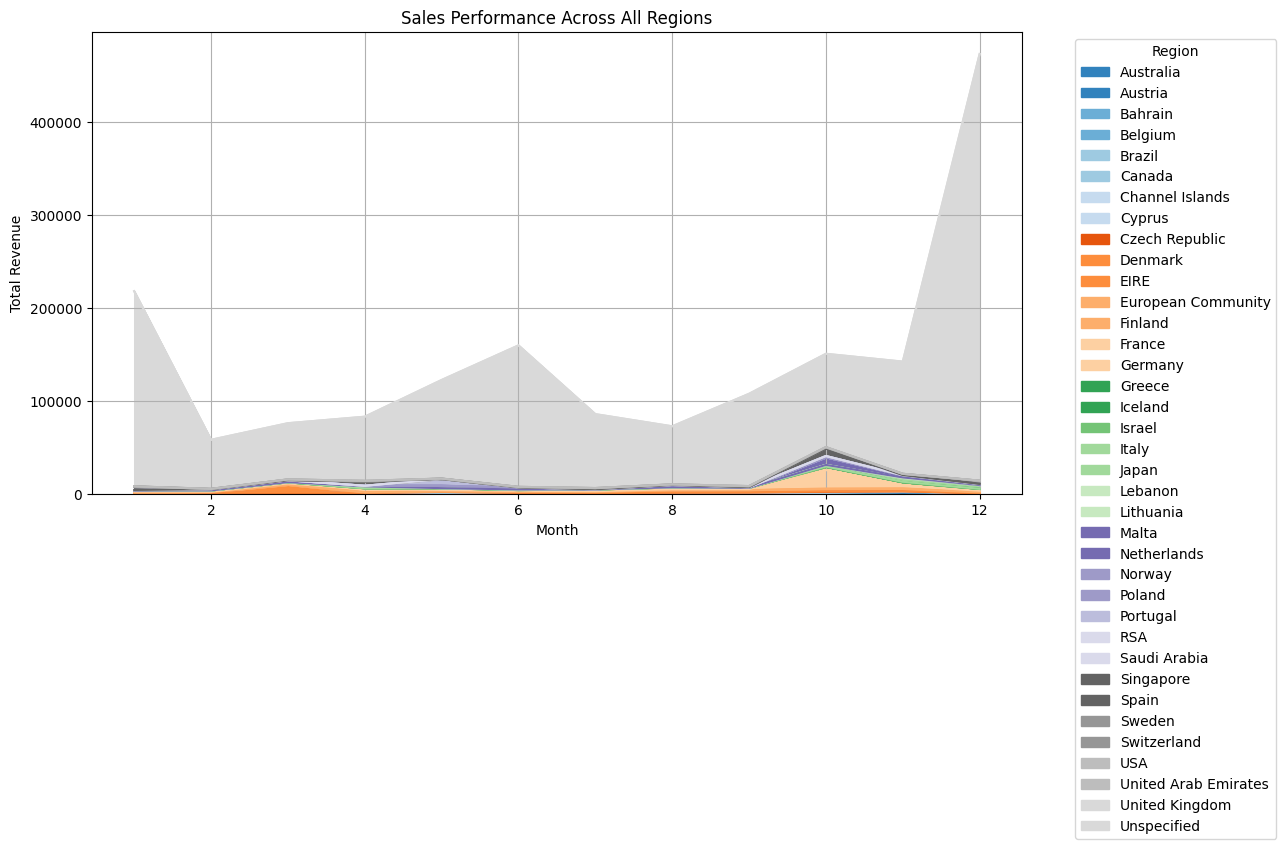

In [41]:
data = df.pivot_table(index='Month', columns='Region', values='Total_Revenue', aggfunc='sum').fillna(0)

data.plot(kind='area', figsize=(12,6), colormap='tab20c')

plt.title('Sales Performance Across All Regions')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside
plt.show()

## Bonus Challenges

### Calculate customer retention rate based on repeat purchases.


In [42]:
repeat_customers = df[df.duplicated(subset=['Customer_ID'], keep=False)]['Customer_ID'].nunique()
total_customers = df['Customer_ID'].nunique()
retention_rate = repeat_customers / total_customers * 100

In [43]:
retention_rate

69.967978042086

### Compare average spending per region.


In [47]:
average_spending_region = df.groupby('Region')['Total_Revenue'].mean().reset_index()

fig = px.bar(average_spending_region, 
            x='Region', 
            y='Total_Revenue', 
            title='Average Spending per Region', 
            labels={'Total_Revenue': 'Average Spending', 'Region': 'Region'},
            color='Region')
fig.show()

### Analyze the correlation between the number of units purchased and the total amount spent.


In [55]:
corrls = df[['Units_Purchased','Amount_Spent']].corr()
corrls.iloc[0,1]

-0.0013523340746400005

### Create a heatmap using Seaborn to show sales trends by weekday and hour.

In [56]:
import plotly.express as px


sales_by_weekday = df.groupby('Week_Day')['Total_Revenue'].sum().reset_index()

fig = px.imshow(
    sales_by_weekday.set_index('Week_Day').T,
    labels={'x': 'Weekday', 'y': 'Total Revenue', 'color': 'Revenue'},
    color_continuous_scale='YlGnBu',
    title='Sales Trends by Weekday'
)

# Show the plot
fig.show()
